In [4]:
import sys
import os
import importlib

# Ajout du chemin une fois
sys.path.append(os.path.abspath('../../python_files'))

# Liste des noms des modules à importer et recharger
module_names = [
    'preprocessing',
    'imports',
    'files',
    'clustering',
    'profile_prediction',
    'prediction_24h'
]

# Import et reload automatique
modules = {}
for name in module_names:
    modules[name] = importlib.import_module(name)
    importlib.reload(modules[name])

# Importer tout en global namespace (équivalent à from ... import *)
for name in module_names:
    exec(f'from {name} import *')



In [6]:
Simulation_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Simulation_Outputs",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Simulation_Outputs",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Simulation_Outputs",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Simulation_Outputs",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Simulation_Outputs",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Simulation_Outputs",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Simulation_Outputs"   
}

Weather_Dataset = {
    "2018": "../../data/simulated_data_7years/Mal_isole/2018/Weather_Dataset.txt",
    "2019": "../../data/simulated_data_7years/Mal_isole/2019/Weather_Dataset.txt",
    "2020": "../../data/simulated_data_7years/Mal_isole/2020/Weather_Dataset.txt",
    "2021": "../../data/simulated_data_7years/Mal_isole/2021/Weather_Dataset.txt",
    "2022": "../../data/simulated_data_7years/Mal_isole/2022/Weather_Dataset.txt",
    "2023": "../../data/simulated_data_7years/Mal_isole/2023/Weather_Dataset.txt",
    "2024": "../../data/simulated_data_7years/Mal_isole/2024/Weather_Dataset.txt"   
}


In [7]:

# Exemple d'utilisation
city_groups = {
    "Weather_Dataset": Weather_Dataset
}

prefix_column_map = {
    "Text_": 1,
    "Hum_": 3,
    "Wind_": 4,
    "Solar_": 5,
    "Ground_": 10
}

combined_data = extract_and_combine_all(city_groups, prefix_column_map)

city_groups = {
    "Simulation_Dataset":Simulation_Dataset  
}

prefix_column_map = {
    "Tint_": 2, 
    "conso_":4  
}

combined_Tint = extract_and_combine_all(city_groups, prefix_column_map)

Text_combined = combined_data.get('Text_combined_Weather_Dataset')
Hum_combined = combined_data.get('Hum_combined_Weather_Dataset')
Wind_combined = combined_data.get('Wind_combined_Weather_Dataset')
Tint_combined = combined_Tint.get('Tint_combined_Simulation_Dataset')
conso_combined = combined_Tint.get('conso_combined_Simulation_Dataset')


In [41]:
occupation=pd.read_csv("../../data/simulated_data_7years/Mal_isole/Occup_Schedule_Youssef.txt")
occ_df = pd.DataFrame(occupation["Occupancy"].values[:8760].reshape(-1, 24))
occupation_7years = pd.concat([occ_df] * 7, ignore_index=True)

In [37]:
clustering_heat = pd.read_csv("../../data/simulated_data_7years/result_data/clustering_heat_7years_data.csv")
conso=clustering_heat.drop(columns=["heat_on","clusters_1"])

In [43]:
# 1. Créer le masque des jours où la consommation est non nulle
jours_ouverts_mask = conso.sum(axis=1) != 0

# 2. Filtrer chaque grandeur avec le même masque
occupation_combined_ouvert = occupation_7years[jours_ouverts_mask].reset_index(drop=True)
Text_combined_ouvert = Text_combined[jours_ouverts_mask].reset_index(drop=True)
Hum_combined_ouvert = Hum_combined[jours_ouverts_mask].reset_index(drop=True)
Tint_combined_ouvert = Tint_combined[jours_ouverts_mask].reset_index(drop=True)
conso_ouvert=conso[jours_ouverts_mask].reset_index(drop=True)

In [44]:
occupation_combined_ouvert_flat = pd.DataFrame(occupation_combined_ouvert.values.flatten(), columns=["valeur"])
Text_combined_ouvert_flat = pd.DataFrame(Text_combined_ouvert.values.flatten(), columns=["valeur"])
Hum_combined_ouvert_flat = pd.DataFrame(Hum_combined_ouvert.values.flatten(), columns=["valeur"])
Tint_combined_ouvert_flat = pd.DataFrame(Tint_combined_ouvert.values.flatten(), columns=["valeur"])
conso_ouvert_flat = pd.DataFrame(conso_ouvert.values.flatten(), columns=["valeur"])


In [45]:
df_corr = pd.concat([
    conso_ouvert_flat.rename(columns={"valeur": "conso"}),
    occupation_combined_ouvert_flat.rename(columns={"valeur": "occupation"}),
    Text_combined_ouvert_flat.rename(columns={"valeur": "Text"}),
    Tint_combined_ouvert_flat.rename(columns={"valeur": "Tint"}),
    Hum_combined_ouvert_flat.rename(columns={"valeur": "humidity"})
 
], axis=1)


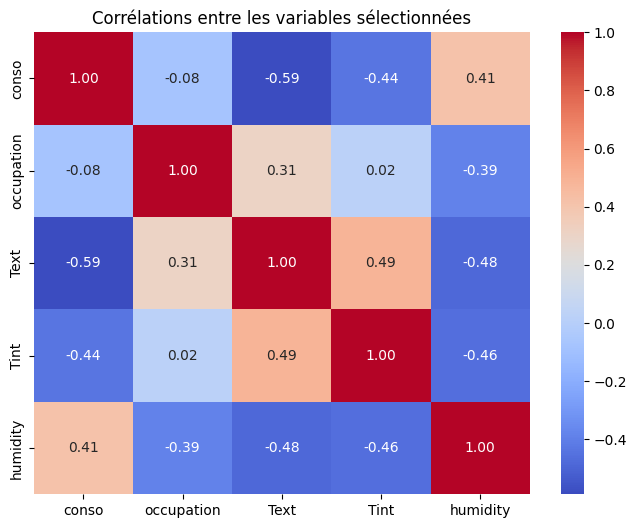

In [46]:
correlation_matrix = df_corr.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre les variables sélectionnées")
plt.show()

### Analyse de corrélation des données entre le 1er novembre et le 30 avril.

In [69]:
clustering_heat = pd.read_csv("../../data/simulated_data_7years/result_data/clustering_heat_7years_data_from_1_novembre_to_31_avril.csv")
conso=clustering_heat.drop(columns=["heat_on","clusters_1"])

In [49]:
start_date = "2018-01-01"
dates = pd.date_range(start=start_date, periods=len(conso_combined), freq="D") 
Text_combined.insert(0, "Date", dates)
Hum_combined.insert(0, "Date", dates)
Tint_combined.insert(0, "Date", dates)
occupation_7years.insert(0, "Date", dates)



In [70]:
conso

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Date
0,0.000000,1190.005593,1312.271393,1424.724691,1527.396881,1603.485177,1671.400352,1740.431185,1790.605077,1216.560286,...,0.000000,0.000000,10.185169,218.400559,366.664243,508.643111,651.904957,778.040225,888.554598,2018-01-01
1,1005.550681,1127.766292,1233.641357,1321.408494,1399.670350,1458.886127,1515.122264,2979.323792,3739.414021,4207.830294,...,2691.564487,2038.984677,588.746369,707.130692,750.194288,778.108310,824.081084,868.599998,893.925703,2018-01-02
2,924.436733,958.702252,968.290817,932.483420,874.717413,830.205371,817.575266,1055.464998,1289.844568,1546.259325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-01-03
3,19.168216,0.000000,18.951647,63.175139,123.523419,159.426268,209.111482,399.231083,621.905997,493.535690,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-01-04
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470.180799,1701.089422,1853.567138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1855.269545,1922.169284,1996.762839,2059.920494,2129.075626,2176.737754,2235.827382,4726.921360,6845.611394,8132.399160,...,2026.435471,386.106839,0.000000,0.000000,0.000000,81.345382,0.000000,212.121982,246.909885,2024-12-25
1263,533.512275,800.023366,1054.457623,1315.364083,1576.297106,1776.415143,1964.386398,5150.941418,8910.060497,10280.940889,...,300.979498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-12-26
1264,135.701989,240.006813,564.344612,866.066752,1143.123950,1402.092014,1630.131841,1863.032539,2064.147063,2181.354689,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-12-27
1265,18.324647,257.623584,617.783817,877.351319,1055.206810,1254.176751,1458.629733,1627.782623,1783.372965,1908.663385,...,545.209283,532.909724,631.731269,1043.007510,1320.078226,1523.293569,1692.012333,1848.803664,1984.524873,2024-12-28


In [62]:

add_heating_season(occupation_7years)
add_heating_season(Tint_combined)
add_heating_season(Hum_combined)
add_heating_season(Text_combined)

df_occ = occupation_7years[occupation_7years["heat"] == 1].copy().reset_index(drop=True)
df_Text = Text_combined[Text_combined["heat"] == 1].copy().reset_index(drop=True)
df_Hum = Hum_combined[Hum_combined["heat"] == 1].copy().reset_index(drop=True)
df_Tint = Tint_combined[Tint_combined["heat"] == 1].copy().reset_index(drop=True)



In [71]:
Text_combined_ouvert_flat = pd.DataFrame(df_Text.drop(columns=['Date','heat']).values.flatten(), columns=["valeur"])
Hum_combined_ouvert_flat = pd.DataFrame(df_Hum.drop(columns=['Date','heat']).values.flatten(), columns=["valeur"])
Tint_combined_ouvert_flat = pd.DataFrame(df_Tint.drop(columns=['Date','heat']).values.flatten(), columns=["valeur"])
occ_ouvert_flat = pd.DataFrame(df_occ.drop(columns=['Date','heat']).values.flatten(), columns=["valeur"])
conso = pd.DataFrame(conso.drop(columns=['Date']).values.flatten(), columns=["valeur"])



In [72]:
df_corr = pd.concat([
    occ_ouvert_flat.rename(columns={"valeur": "occupation"}),
    conso.rename(columns={"valeur": "conso"}),
    Text_combined_ouvert_flat.rename(columns={"valeur": "Text"}),
    Tint_combined_ouvert_flat.rename(columns={"valeur": "Tint"}),
    Hum_combined_ouvert_flat.rename(columns={"valeur": "humidity"})
 
], axis=1)


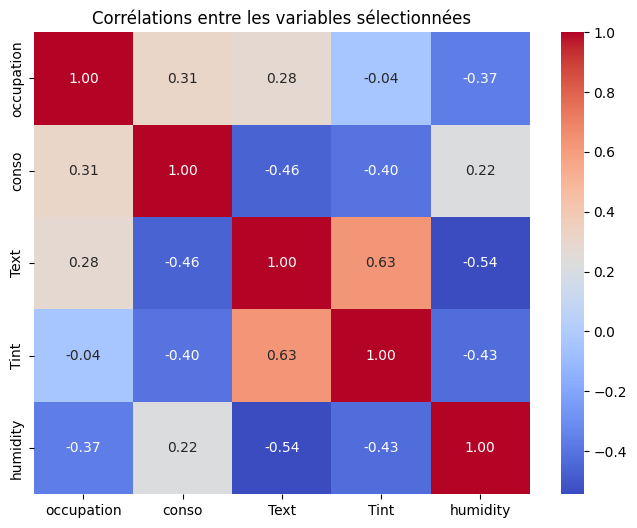

In [73]:
correlation_matrix = df_corr.corr()

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre les variables sélectionnées")
plt.show()